Settings

In [28]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

In [29]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


plt.style.use('ggplot')
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})

# The `BOCOPSolution` class

The main class implemented in this library, which contains all the solution information. We import it like such:

In [30]:
from bocop_solution import BOCOPSolution

As a first example, we consider the [Harvest](https://www.bocop.org/harvest/) problem. After solving this problem in BOCOP,
and saving the solution in the directory `data/harvest`, we create a `BOCOPSolution` instance.

In [31]:
harvest = BOCOPSolution("data/harvest")

# Variable Bunches
Variables come in three types: controls, states, or adjoint states.
For each type of variable, the `harvest` object has an attribute that holds all variables of that same type.
We can get them like such:

In [32]:
controls = harvest.controls
states = harvest.states
adjoint_states = harvest.adjoint_states

All of these are instances of the same superclass: `_VariableBunch`
(**NOTE**: the leading underscore of any class name is to indicate that you should not initialize it manually).
This means they share a lot of the same methods, so we cover these first:

## The `plot` method:

We may plot any bunch, which creates a subplot where each axis holds one variable.

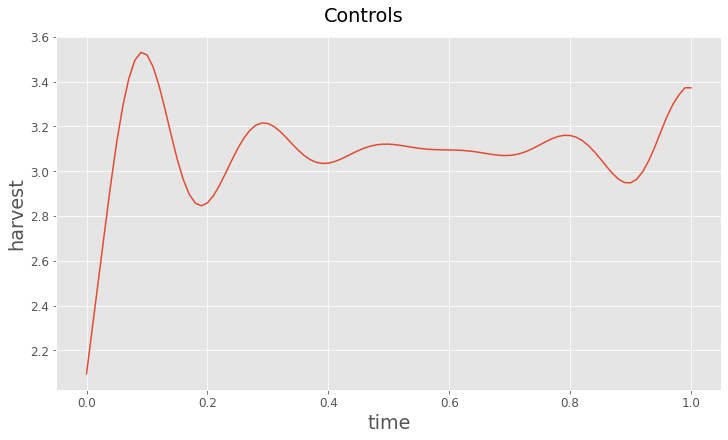

In [33]:
controls.plot();

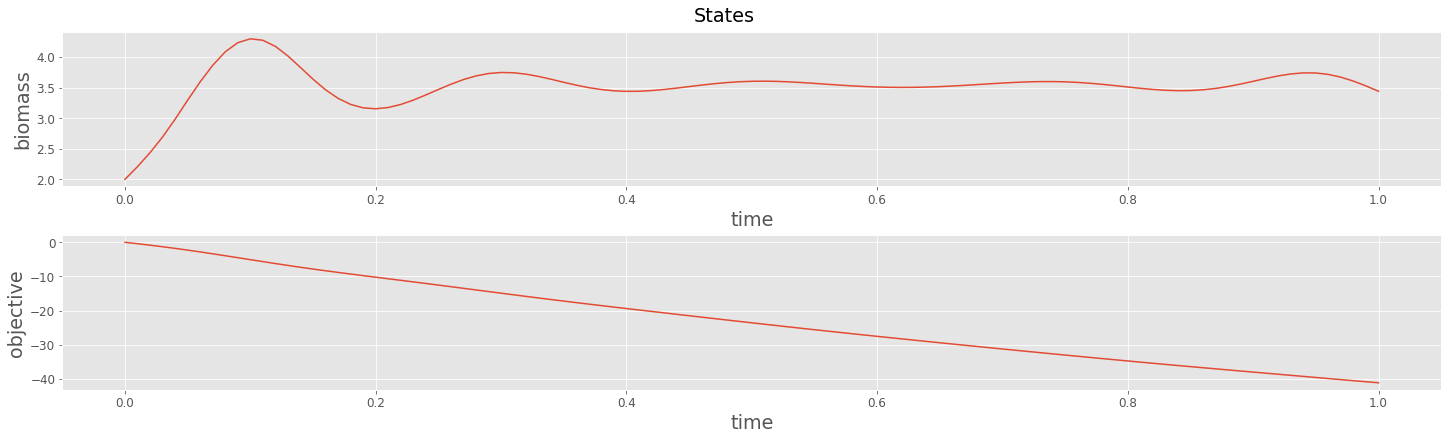

In [34]:
states.plot();

This method also takes as parameters values `n_row, n_col` which specify how to place the subplots:

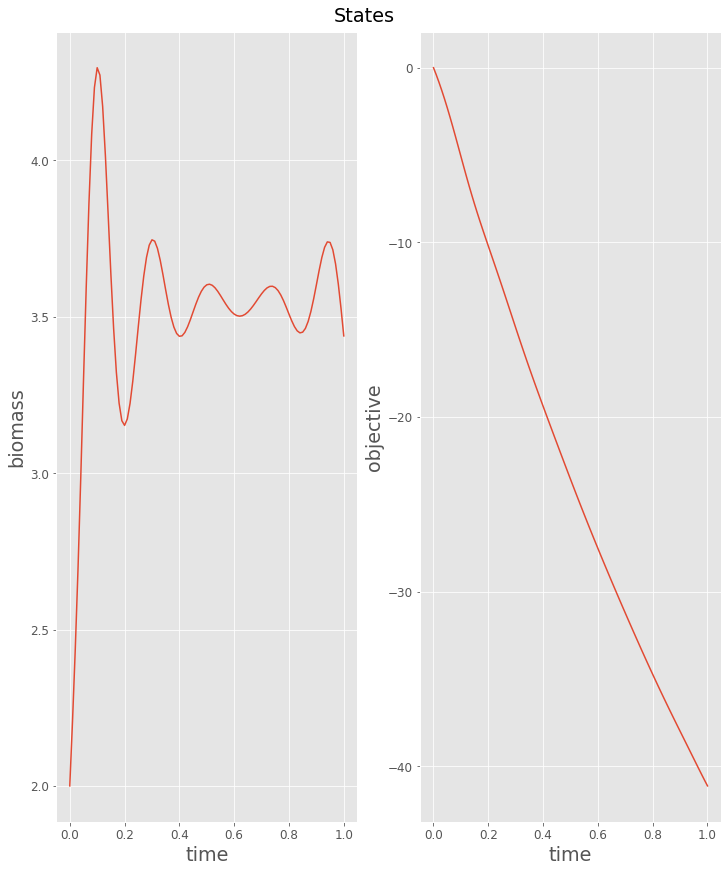

In [35]:
states.plot(2, 1);

It also takes optional parameters passed to `plt.subplots`.

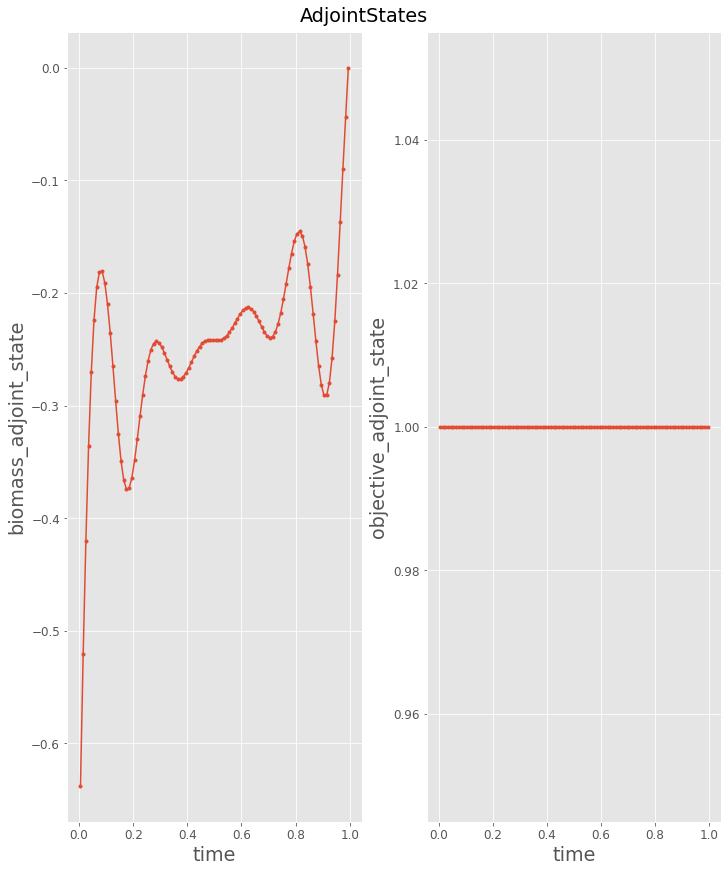

In [36]:
adjoint_states.plot(2, 1, marker=".");

This method returns a`(fig, axes)`object, so you can customize the plot as you wish with Matplotlib.
This will be the case for ALL plotting methods of this library.
Check out the documentation (or use the `help` command) to see optional parameters that this method takes.

## Getting a bunch as a DataFrame
Since a bunch collects variables that are all indexed equally by the discretization times, you may access a DataFrame with all the information. For example:

In [37]:
states.dataframe

,biomass,objective
0.00,2.00000,0.000000
0.01,2.20695,-0.404647
0.02,2.43577,-0.836096
0.03,2.69209,-1.293210
0.04,2.98269,-1.775690
...,...,...
0.96,3.71430,-39.893100
0.97,3.66906,-40.207600
0.98,3.60481,-40.519200
0.99,3.52622,-40.826700


Remember that this also works for controls and adjoint states.

## Phase Diagrams
This feature is specific to state and adjoint state variable bunches:
It is not available for the control bunch.
You may choose two variables (of the same bunch) and plot them with the `phase_space_plot` method,
which takes the variable names as parameters:

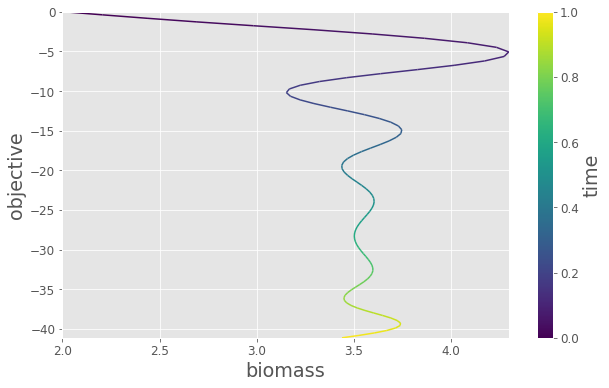

In [38]:
states.phase_space_plot("biomass", "objective");

Again, there are more optional parameters.

## Getting each variable
Like mentioned before, a bunch is just a collection of variables.
Each variable is held in a `_Variable` object, which will be covered in further below.
However, it is important to know how to retrieve one of these variables.
One way is accessing the `variables` attribute of a bunch, which holds a dictionary with each variable:

In [39]:
states.variables

{'biomass': _Variable(biomass), 'objective': _Variable(objective)}

And with that, we may get a wanted value in this dictionary like expected. If we want to study the biomass variable:

In [40]:
states.variables["biomass"]

_Variable(biomass)

However, to deal with this cumbersome notation we allow you to get a variable directly by indexing the bunch itself with no need to access the dictionary yourself:

In [41]:
states["biomass"]

_Variable(biomass)

More so, if the name of the variable allows this, you may even call it as an attribute:

In [42]:
biomass = states.biomass
biomass

_Variable(biomass)

# Variables
Like mentioned, variables have several features to make them easy to work with. For now, we will only look at biomass.

## Getting values as arrays or series:
We are able to get a variable both as a `np.ndarray` with the `values` attribute

In [43]:
biomass.values

array([2.     , 2.20695, 2.43577, 2.69209, 2.98269, 3.29439, 3.5936 ,
       3.8639 , 4.08438, 4.23313, 4.2963 , 4.27279, 4.17243, 4.0153 ,
       3.82775, 3.63633, 3.46297, 3.32276, 3.22369, 3.16775, 3.15266,
       3.17337, 3.22316, 3.29434, 3.37874, 3.46806, 3.55426, 3.63011,
       3.68969, 3.72894, 3.74605, 3.74164, 3.71848, 3.6811 , 3.63497,
       3.58579, 3.53878, 3.49815, 3.46686, 3.44652, 3.43751, 3.43915,
       3.44996, 3.46788, 3.49053, 3.51541, 3.54014, 3.56261, 3.58113,
       3.59452, 3.60218, 3.60405, 3.60059, 3.59264, 3.58132, 3.56788,
       3.55359, 3.53962, 3.52695, 3.51639, 3.50849, 3.5036 , 3.5019 ,
       3.50337, 3.50785, 3.51506, 3.52459, 3.53591, 3.54836, 3.56116,
       3.5734 , 3.58412, 3.59232, 3.59705, 3.5975 , 3.59315, 3.58379,
       3.56968, 3.55155, 3.5306 , 3.50845, 3.48704, 3.4685 , 3.45499,
       3.44851, 3.45074, 3.46279, 3.48506, 3.51698, 3.55687, 3.60182,
       3.64777, 3.68966, 3.72195, 3.73937, 3.73771, 3.7143 , 3.66906,
       3.60481, 3.52

Or as a `pd.Series` indexed by the discretization time with the `series` attribute.


In [44]:
biomass.series


0.00    2.00000
0.01    2.20695
0.02    2.43577
0.03    2.69209
0.04    2.98269
         ...   
0.96    3.71430
0.97    3.66906
0.98    3.60481
0.99    3.52622
1.00    3.43877
Name: biomass, Length: 101, dtype: float64

Note that we can directly get this discretization time as an array too:


In [45]:
biomass.discretization_times


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

## `plot` method
The VariableBunch `plot` method just calls this one as arranges it in a grid.
This method optionally takes in the axis in which to draw the variable plot.

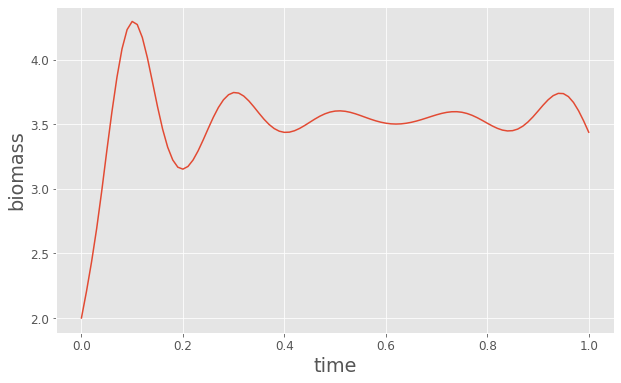

In [46]:
biomass.plot();

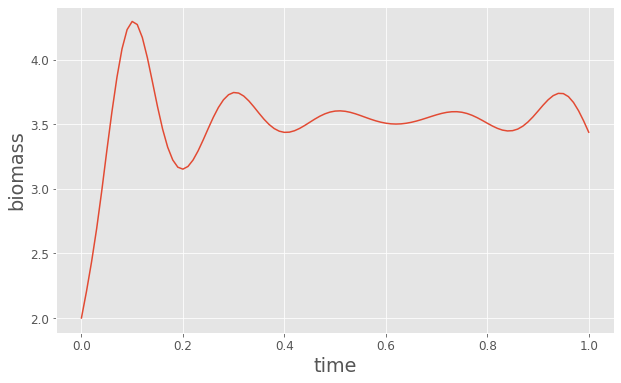

In [47]:
ax = plt.subplots(1, 1)[1]
biomass.plot(ax);

## Interpolation:
Lastly, variables implement interpolation via scipy's [Interpolated Univariate Cubic Spline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html#scipy.interpolate.InterpolatedUnivariateSpline),
which we can access in the `cubic_interpolator` attribute

In [48]:
interp = biomass.cubic_interpolator
interp

Let's plot it:

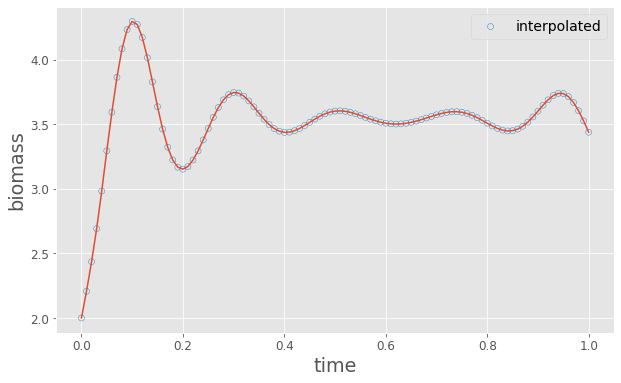

In [49]:
times = biomass.discretization_times
fig, ax = plt.subplots(1, 1)
ax.scatter(times, interp(times), label="interpolated", marker="o", c='None', edgecolors='C1')
biomass.plot(ax)
ax.legend();

The `InterpolatedUnivariateSpline` object has many utilities, such as:

* Evaluating the variable at points in between the discretization times
* Numerical differentiation
* Numerical integration

For this first objective, Variable objects are callable, and return the values of calling the cubic interpolator:

In [50]:
biomass(np.linspace(0, 1))

array([2.        , 2.44563744, 3.00774707, 3.62858096, 4.11405427,
       4.29836306, 4.13824639, 3.77239254, 3.41302915, 3.19818144,
       3.15714408, 3.25295443, 3.42238365, 3.59620514, 3.7147733 ,
       3.74576721, 3.69534811, 3.60084131, 3.50811898, 3.45009679,
       3.43810915, 3.46497284, 3.51283971, 3.56133292, 3.59430289,
       3.60403037, 3.59203147, 3.56643996, 3.53770954, 3.51472708,
       3.50293868, 3.5042747 , 3.51775327, 3.54013857, 3.56602448,
       3.588     , 3.59783211, 3.58899434, 3.56011991, 3.51751656,
       3.47483898, 3.44974128, 3.4583071 , 3.50834289, 3.59241799,
       3.68332919, 3.73818887, 3.71704727, 3.60774853, 3.43877   ])

Lastly, you may be interested in inverting the function, that is to say, find $t$ such that $f(t) = y$ for a given $y$.
We implement this by using root finding in the spline interpolator.
Root finding algorithms require a starting point:
 If none is given, we use the $t$ in the discretization times such that $|f(t) - y|$ is smallest.
Different starting values can find different solutions in the case that $f$ is not injective.

This is found in the `inverse` method of a variable, does this process in a vectorized fashion:

In [51]:
biomass.inverse(np.array([2.7, 3.8]))

array([1.02944119, 1.12295127])

### Special case: Piecewise constant interpolation
Certain optimal controls are bang-bang (or piecewise constants).
For these cases, we implement a custom interpolator.
To see it in action, we change to the [Leukemia](https://www.bocop.org/leukemia/) problem:

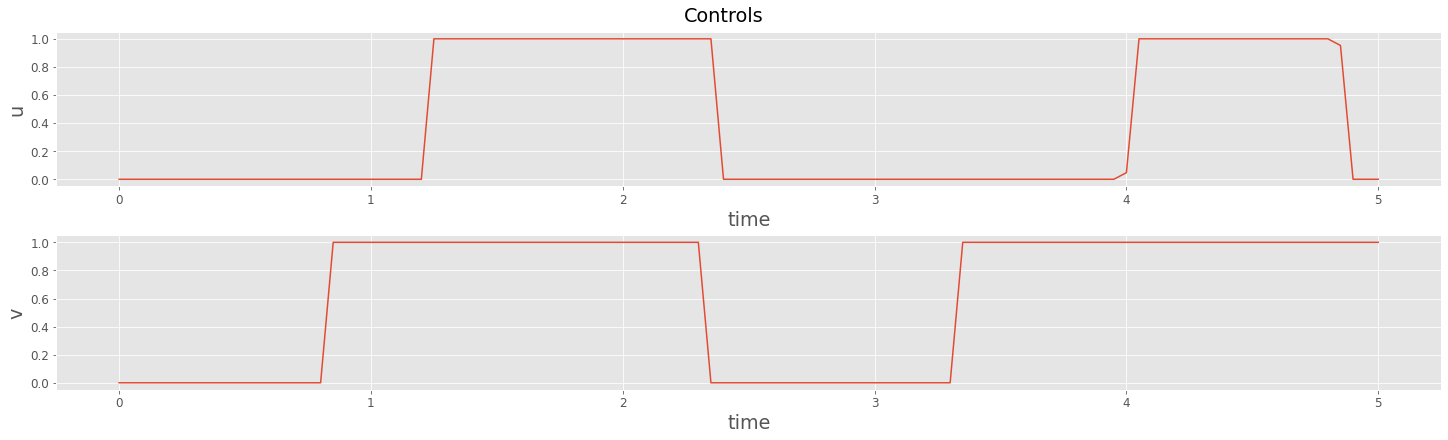

In [52]:
leukemia = BOCOPSolution("data/leukemia")
leukemia.controls.plot();

We will look at the $u$ variable. We can access our custom interpolator in the `step_interpolator` attribute.
Printing it shows it's LaTeX representation (which is rendered if displayed in a Jupyter Notebook)

In [53]:
u = leukemia.controls.u
step_interpolator = u.step_interpolator
print(step_interpolator)
display(step_interpolator)

u(t) \approx \begin{cases}
0.0 &\text{ if } t\in [0.0, 1.25) \\
1.0 &\text{ if } t\in [1.25, 2.4) \\
0.0 &\text{ if } t\in [2.4, 4.0) \\
0.52362305 &\text{ if } t\in [4.0, 4.05) \\
1.0 &\text{ if } t\in [4.05, 4.85) \\
0.476377 &\text{ if } t\in [4.85, 4.9) \\
0.0 &\text{ if } t\in [4.9, 5.0) \\
\end{cases}


u(t) \approx \begin{cases}
0.0 &\text{ if } t\in [0.0, 1.25) \\
1.0 &\text{ if } t\in [1.25, 2.4) \\
0.0 &\text{ if } t\in [2.4, 4.0) \\
0.52362305 &\text{ if } t\in [4.0, 4.05) \\
1.0 &\text{ if } t\in [4.05, 4.85) \\
0.476377 &\text{ if } t\in [4.85, 4.9) \\
0.0 &\text{ if } t\in [4.9, 5.0) \\
\end{cases}

Note that this is not quite perfect yet, it should only show a 0-1 valued control, but it also gave ~0.5 near change points.
Future implementations will attempt to improve change detection. The interpolator is also callable as expected:

In [54]:
step_interpolator(np.linspace(0, 4))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.52362305])